In [1]:
#!/usr/bin/env python3
#-*- coding: utf8 -*-


"""
00-first-tour.py
"""


"""
find here a first study of the dataset, in which we seek to understand and
give meaning to the dataset.
we are not trying to solve our problem but will focus on visualization,
clenaning and feature engineering.
at first we will just study the corelations, the links, the quality and the
meaning of our dataset.
external research and more general considerations may be included in this work
"""


'\nfind here a first study of the dataset, in which we seek to understand and\ngive meaning to the dataset.\nwe are not trying to solve our problem but will focus on visualization,\nclenaning and feature engineering.\nat first we will just study the corelations, the links, the quality and the\nmeaning of our dataset.\nexternal research and more general considerations may be included in this work\n'

In [2]:
# import

import os, sys, logging, random

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
# logging 

l = logging.WARNING
logging.basicConfig(level=l, format="%(levelname)s : %(message)s")
info = logging.info


In [4]:
# graph

%matplotlib inline
sns.set()


In [5]:
# consts

FOLDER      = "Driven-Data-Blood-Donations"
TRAIN_FILE  = "training_data.csv"
TEST_FILE   = "test_data.csv"


In [6]:
# First : just find our data folder in the repo structure from anywhere


def finding_master_path(folder="data") :

    path = os.getcwd()
    path = path.split("/")

    idx  = path.index(FOLDER)
    path = path[:idx+1]
    folder = str(folder) + "/"
    path.append(folder)
    
    path = "/".join(path)

    # check if path is a valid path
    if not os.path.isdir(path) : 
        raise NotADirectoryError

    return path

####

path = finding_master_path()
path

'/home/alex/Driven-Data-Blood-Donations/data/'

In [7]:
# Then : Control that our datafiles are Ok

def return_datasets(path) : 
    
    li = [i for i in os.listdir(path) if ".csv" in i ]
    
    return li 

####

files = return_datasets(path)
files


['submission_format.csv', 'test_data.csv', 'training_data.csv']

In [8]:
# init our dataframe 

def build_df(path, file) : 


    df          = pd.read_csv(path+file, index_col=0)
    df.columns  = pd.Index( ["last_don", "num_don","vol_don", "first_don", 
                            "target"], dtype="object")


    return df

####

df = build_df("/home/alex/Driven-Data-Blood-Donations/data/", TRAIN_FILE)

# output contol
df.head()

,last_don,num_don,vol_don,first_don,target
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


In [9]:
# let's have a first raw tour about this df


def print_df(df) : 
    
    print(df.ndim)
    print(df.shape)
    print(df.dtypes)
    print(df.index)
    print(df.columns)
    print(df.describe())
    print(df.head(3))
    print(df.tail(3))
    
####

print_df(df)


2
(576, 5)
last_don     int64
num_don      int64
vol_don      int64
first_don    int64
target       int64
dtype: object
Int64Index([619, 664, 441, 160, 358, 335,  47, 164, 736, 436,
            ...
            361,  30, 337, 496, 169, 698, 433, 360, 541,  74],
           dtype='int64', length=576)
Index(['last_don', 'num_don', 'vol_don', 'first_don', 'target'], dtype='object')
         last_don     num_don       vol_don   first_don      target
count  576.000000  576.000000    576.000000  576.000000  576.000000
mean     9.439236    5.427083   1356.770833   34.050347    0.239583
std      8.175454    5.740010   1435.002556   24.227672    0.427200
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.000000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   49.250000    0.000000
max     74.000000   50.000000  12500.000000   98.000000    1.000000
     las

In [10]:
# let's retype our values to reduce mem usage (a little overkilled action? yes of course!)

def re_dtype(df) : 

    # li = [np.uint8, np.uint16]
    # [print(i,  np.iinfo(i).min, np.iinfo(i).max) for i in li]

    dtypes_dict = {     "last_don"  : np.uint8, 
                        "num_don"   : np.uint8,
                        "vol_don"   : np.uint16, 
                        "first_don" : np.uint8, 
                        "target"    : np.uint8       }


    df = df.astype(dtypes_dict)

    return df 

####

df = re_dtype(df)
df.head()

,last_don,num_don,vol_don,first_don,target
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


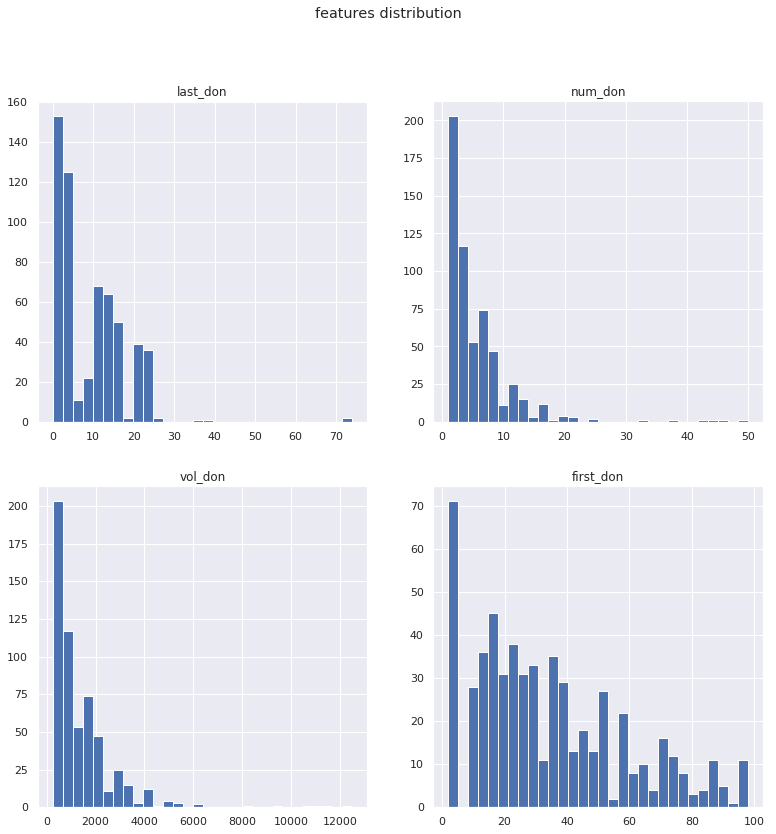

In [11]:
# let's have a second tour of our dataset but with graphical tools

def graph_each_feature(df)  : 

    features = [i for i in df.columns if "target" not in i] 

    fig, _axes = plt.subplots(2, 2, figsize=(13,13))
    axes = _axes.flatten()

    info(fig)
    info(axes)
    info(len(axes))

    for i, feat in enumerate(features) :
        info(i, feat)

        # -----------------------------------------
        # sns.distplot --> (kde=True ) ???
        # -----------------------------------------

        axes[i].hist(df[feat], bins=30)
        axes[i].set_title(feat)

    plt.suptitle("features distribution")
    
plt.show()


####

graph_each_feature(df)


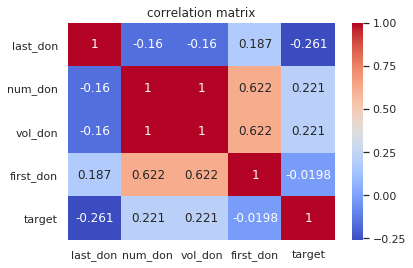

In [12]:
# looking in depth : finding correlation between features

def graph_corr_matrix(df) : 
    
    corr_mat = df.corr()
    sns.heatmap(corr_mat, cmap="coolwarm", annot=True, fmt='.3g')

    plt.title("correlation matrix")
    
    plt.show()

####

graph_corr_matrix(df)


In [13]:
# so without doupt we can drop perfectly correlated features

def drop_corr_features(df) : 

    df = df.drop("vol_don", axis=1)

    return df 

####

df = drop_corr_features(df)
df.head()

,last_don,num_don,first_don,target
619,2,50,98,1
664,0,13,28,1
441,1,16,35,1
160,2,20,45,1
358,1,24,77,0


In [14]:
# what about nas?

def study_nas(df) : 

    print(df.isna().any())
    print(df.isna().any())

####

study_nas(df)


last_don     False
num_don      False
first_don    False
target       False
dtype: bool
last_don     False
num_don      False
first_don    False
target       False
dtype: bool


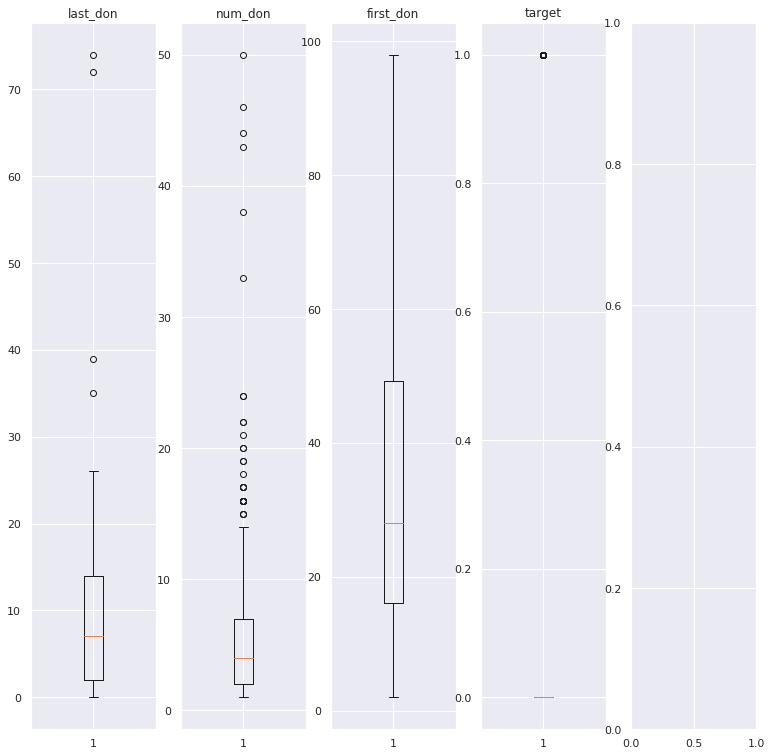

In [15]:
# ok perfect, too easy maybe...
# what about outliers ? 

def study_outliers(df, k=1.5) : 
    
    fig, _axes = plt.subplots(1, 5, figsize=(13,13))
    axes = _axes.flatten()

    info(fig)
    info(axes)
    info(len(axes))

    for i, feat in enumerate(df.columns) :
        info(i, feat)

        axes[i].boxplot(df[feat])
        axes[i].set_title(feat)

    
    plt.show()

####

study_outliers(df)

In [16]:
# after all ! we have a first real data scientist job to do : cleaning! 
# so we will design one function to be able to reshape our df at will

def return_outliers(ser, k) : 

    desc = ser.describe()
    q1, q3, q2 = desc["25%"], desc["75%"], desc["50%"]
    IQ = q3-q1
    range_min, range_max = q1 - k * IQ, q3 + k*IQ

    # outliers = ser[(ser > range_max) or (ser < range_min)]
    
    return ser >= range_max


def delete_outliers(df, k) : 

    li = [i for i in df.columns if "target" not in i]

    for feat in li : 
        df = df[return_outliers(df[feat], k) == False]

    return df

####

df = delete_outliers(df, 3)
df.head()


,last_don,num_don,first_don,target
664,0,13,28,1
441,1,16,35,1
160,2,20,45,1
335,4,4,4,0
47,2,7,14,1


In [17]:
# and finally to be as confortable as possible, regroup all these opps in one function

def first_tour(folder="data", file=TRAIN_FILE) : 

    # build data path
    path = finding_master_path("data")
    # info(path)                            # UNCOMMENT IF NEEDED

    # just show dataset list
    # datasets = return_datasets(path)      # UNCOMMENT IF NEEDED
    # info(datasets)                        # UNCOMMENT IF NEEDED

    # build our df
    df = build_df(path, file)

    # print main info
    # print_df(df)                          # UNCOMMENT IF NEEDED

    # (overkilled) recast dataframe in a better dtype
    df = re_dtype(df)

    # graph features distr and correlation  # UNCOMMENT IF NEEDED
    # graph_each_feature(df)                  
    # graph_corr_matrix(df)                 # UNCOMMENT IF NEEDED

    # drop corr values
    df = drop_corr_features(df)

    # nas
    # study_nas(df)                         # UNCOMMENT IF NEEDED

    # for i in [1.5, 2, 2.5, 3] :           # UNCOMMENT IF NEEDED
    # study_outliers(df, i)                 # UNCOMMENT IF NEEDED

    # df = delete_outliers(df, 3)            # UNCOMMENT IF NEEDED

    return df

####


df = first_tour(folder="/home/alex/Driven-Data-Blood-Donations/data/", file=TRAIN_FILE) 
df.head()

,last_don,num_don,first_don,target
619,2,50,98,1
664,0,13,28,1
441,1,16,35,1
160,2,20,45,1
358,1,24,77,0


In [18]:
# Conclusion

# Through this first study, we can see several things. Our dataset is of very good quality, few outliers, 
# no missing values, a number of features reduced and little corelation.

# Its simplicity will be an obvious limit when it comes to making feature engineering, benchmarking 
# models and looking for marginal improvements.